<a href="https://www.kaggle.com/code/kapusharinka/spam-ham-emails?scriptVersionId=168273833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
from pprint import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Articles about ML
https://github.com/christianversloot/machine-learning-articles/tree/main

# Data preprocessing
## Preparing datasets
So here are three datasets with emails. Here I'm showing their contents and concatenate them in one dataset.

In [115]:
data1 = pd.read_csv('/kaggle/input/email-spam-dataset/lingSpam.csv')
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [116]:
data2 = pd.read_csv('/kaggle/input/email-spam-dataset/enronSpamSubset.csv')
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Unnamed: 0.1  10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [117]:
data3 = pd.read_csv('/kaggle/input/email-spam-dataset/completeSpamAssassin.csv')
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [118]:
# delete unneeded columns
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [119]:
# Remove rows where the text in 'text_column' is longer than max_length
def filter_by_body_length(df):
    max_length = 100000
    return df[df['Body'].apply(lambda x: len(str(x)) <= max_length)]

data1 = filter_by_body_length(data1)
data2 = filter_by_body_length(data2)
data3 = filter_by_body_length(data3)

In [120]:
# concatenate data and take a small fraction
# data = pd.concat([data1,data2,data3],axis=0).sample(frac=0.05)
data = data1.sample(frac=0.3)
# remove missing values (NaN)
data.dropna(inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 436 to 2114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    781 non-null    object
 1   Label   781 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


,Body,Label
436,"Subject: gent conference\n \n "" for the listse...",0
2345,Subject: granada workshop\n \n adapting lexica...,0
1379,Subject: contrastive grammar www home page\n \...,0
1283,Subject: query : guide to software for linguis...,0
2262,Subject: american journal of germanic linguist...,0


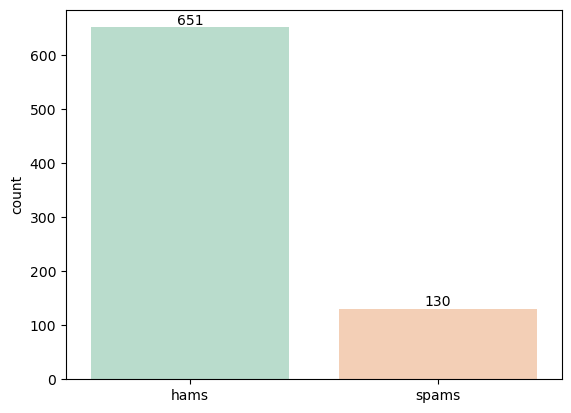

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=data["Label"], palette=("Pastel2"))
abs_values = data["Label"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['hams', 'spams'])

plt.xlabel(None)
plt.show()

In [122]:
emails = data["Body"]

Here I'm removing unneeded characters, like HTML tags, emails etc.

In [123]:
import re

# remove emails
emails = [re.sub('\S*@\S*\s?', '', text) for text in emails]
# remove url links
emails = [re.sub('\S*(http[s]?://|www\.)\S*', '', text) for text in emails]
# remove HTML tags
emails = [re.sub(r"'<.*?>'", "", text) for text in emails]
# remove special characters and numbers
emails = [re.sub("[^a-zA-Z]"," ",text) for text in emails]
# remove too short (2- characters) words
emails = [re.sub(r"\b\w{1,2}\b", "",text) for text in emails]
# and too long (17+ characters) 
emails = [re.sub(r"\b\w{17,}\b", "",text) for text in emails]
# remove multiple spaces
emails = [re.sub(' +', ' ', text).strip() for text in emails]
# lower
emails = [text.lower() for text in emails]

emails[0]

'subject gent conference for the listserv international conference second circular february literature and the analysis discourse with special attention the multicultural context tuesday september friday september gent university belgium writing and reading literature oral literary traditions dialogic text non literary narratives discourse theory literature social practice etc etc etc keynote speakers david birch murdoch australia martin montgomery strathclyde scotland elinor ochs los angeles usa statement pala aims pala principal aim encourage cooperation between scholars and teachers interested language and literary studies the interests pala members are wide and this reflected papers given pala conferences interests members include stylistics literary theory the teaching language and literature critical linguistics pragmatics discours analysis textual understanding rhetoric narratology semiotic approaches text and performance sociolinguistics cultural studies post structuralist theo

## Tokenization and lemmatization
Tokenization: [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition) (page 180)
<ul>
    <li>one-hot encoding of tokens</li>
    <li>token embedding</li>
</ul>
For more, look at <i>Deep Learning</i> section below.

We can choose between stemming or lemmatization - lemmatizators are slower, but change tenses and nouns. <br/>
https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

Firstly I used NLTK lemmatization, but it is very slow on my computer, so I tried SpaCy instead (https://spacy.io).

In [124]:
custom_stopwords = ['subject', 'empty', 'email', 'mail', 'enron', 'linux', 'list', 'get', 'http', 'vince', 'com', 'org', 'www', 'etc', 'ect', 'edu', 'hou', 'would', 'need']

### Using NLTK
Everything is very slow, but still works.

In [125]:
# tokenization

# import nltk
# emails = [nltk.word_tokenize(text) for text in emails]
# emails[0][:15]

In [126]:
# remove stopwords

# stopwords = nltk.corpus.stopwords.words("english")
# stopwords.extend(custom_stopwords)
# emails = [[word for word in text if word not in stopwords] for text in emails]
# emails[0][:15]

In [127]:
# lemmatization
# very long

# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet

# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     return tag_dict.get(tag, wordnet.NOUN)

# nltk.data.path.append('/kaggle/input/corpora/')
# lemmatizer = WordNetLemmatizer()
# emails = [[lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text] for text in emails]
# emails[0][:15]

### Using SpaCy
https://stackoverflow.com/a/75215495

In [128]:
import spacy

nlp = spacy.load("en_core_web_sm")

# remove stop words
for word in custom_stopwords:
    nlp.vocab[word].is_stop = True

In [129]:
# lemmatization
emails = [[token.lemma_ for token in nlp(text) if not token.is_stop] for text in emails]
emails[0][:15]

['gent',
 'conference',
 'listserv',
 'international',
 'conference',
 'second',
 'circular',
 'february',
 'literature',
 'analysis',
 'discourse',
 'special',
 'attention',
 'multicultural',
 'context']

## Feature extraction 
Creating a vector of features (words) for each email. <br />
OpenAI:
> Both CountVectorizer and TF-IDF (Term Frequency-Inverse Document Frequency) from scikit-learn are popular techniques for feature extraction in text data like emails, and each has its own merits.
> 
> CountVectorizer creates a Bag of Words (BoW) model, where the features are the counts of each word in the document. This method is simple and easy to implement but can give more importance to words that appear frequently, regardless of their significance in distinguishing spam from non-spam emails.
> 
> TF-IDF, on the other hand, takes into account not only the frequency of a word in a document but also its inverse frequency across all documents. This means that words that are common across all emails will receive lower weights, while words that are unique to specific emails will receive higher weights. This can be advantageous for spam detection, as spam emails often contain specific words or phrases that are less common in legitimate emails.
> 
> In general, TF-IDF tends to work better than CountVectorizer for spam detection because it can better capture the importance of different words. However, the choice between the two methods will depend on the specific characteristics of the dataset and the problem you're trying to solve. It's a good idea to experiment with both techniques and evaluate their performance on your dataset using cross-validation or a separate validation set. This will help you determine which method works best for your particular spam detection task.

In [130]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range=(1,2) means that the model will consider bigrams too
# min_df=0.003 means that the model will not consider rare words
count_vectorizer = CountVectorizer(max_features=25000, ngram_range=(1,1), min_df=0.003, max_df=0.9)
bag_of_words = count_vectorizer.fit_transform([" ".join(text) for text in emails]).toarray()
print(bag_of_words.shape)
count_vectorizer.get_feature_names_out()[:10] # first 10 in alphabetical order

(781, 5947)


array(['aaai', 'aachen', 'aau', 'abandon', 'abbreviation', 'abd',
       'abeille', 'abide', 'ability', 'able'], dtype=object)

In [131]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1,1), min_df=0.003, max_df=0.9)
tf_idf = tf_vectorizer.fit_transform([" ".join(text) for text in emails]).toarray()
print(tf_idf.shape)
tf_vectorizer.get_feature_names_out()[:10]

(781, 5947)


array(['aaai', 'aachen', 'aau', 'abandon', 'abbreviation', 'abd',
       'abeille', 'abide', 'ability', 'able'], dtype=object)

## Word embeddings
A word embedding is a vector, that tries to capture "meaning" of a word/sentence/document etc... Some of the algorithms are provided by Word2Vec, GloVe. I used one provided by SpaCy.

### Word2vec
http://jalammar.github.io/illustrated-word2vec/<br/>
https://www.freecodecamp.org/news/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3/<br/>
https://www.advancinganalytics.co.uk/blog/2022/7/22/using-machine-learning-to-perform-text-clustering<br/>
https://aclanthology.org/I17-2006.pdf#:~:text=More%20specically%2C%20we%20show%20that%20the%20number%20of,in%20degradation%20of%20quality%20of%20learned%20word%20embeddings.

In [132]:
# using Gensim - not working well
from gensim.models import Word2Vec
from scipy import spatial

def get_email_vector(i):
    return np.mean(np.array(word2vec_model.wv[emails[i]]), axis=0)

word2vec_model = Word2Vec(emails, vector_size=1000, min_count=1, workers=4)

first_ham = np.where(data['Label'] == 0)[0][0]
second_ham = np.where(data['Label'] == 0)[0][1]
first_spam = np.where(data['Label'] == 1)[0][0]

sim = 1 - spatial.distance.cosine(get_email_vector(first_ham), get_email_vector(second_ham))
print(sim)

sim = 1 - spatial.distance.cosine(get_email_vector(first_ham), get_email_vector(first_spam))
print(sim)

0.9997658729553223
0.9978690147399902


### Using SpaCy
Also check [sense2vec](http://https://github.com/explosion/sense2vec)

In [133]:
nlp = spacy.blank("en")
nlp.from_disk('/kaggle/input/en-core-web-lg/en_core_web_lg/en_core_web_lg-3.6.0')

Just some playing.<br/>
https://www.kaggle.com/code/hassanamin/learning-spacy-basics

In [134]:
# Document similarity
doc1 = nlp("I like guinea pigs")
doc2 = nlp("Apple is looking at buying U.K. startup for $1 billion")
print(doc1.similarity(doc2))

doc1 = nlp("I like guinea pigs")
doc2 = nlp("I like cats")
print(doc1.similarity(doc2))

# Compare two tokens
doc = nlp("I like vegetables and buckwheat.")
token1 = doc[2]
token2 = doc[4]
print("Token 1, Token 2: ",token1,", ",token2)
print(token1.similarity(token2))

# Compare a document with a token
doc = nlp("king")
token = nlp("prince")[0]
print(doc.similarity(token))

-0.06765623693853647
0.9352704992293962
Token 1, Token 2:  vegetables ,  buckwheat
0.647589921951294
0.7827692319745013


Creating vectors for each email. We take a vector for each word from email, and finding the average vector for a whole email.

In [135]:
email_embeddings = []
for email in emails:
    spacy_doc = nlp(' '.join(email))
    avg_vector = sum([token.vector for token in spacy_doc]) / len(email)
    email_embeddings.append(avg_vector)

More playing.

In [136]:
from sklearn.metrics.pairwise import cosine_similarity

ham1 = np.where(data['Label'] == 0)[0][0]
ham2 = np.where(data['Label'] == 0)[0][1]
spam = np.where(data['Label'] == 1)[0][0]

print("\nHam 1:", data.iloc[ham1]['Body'][:500])
print("\nHam 2:", data.iloc[ham2]['Body'][:500])
print("\nSpam:", data.iloc[spam]['Body'][:500])

ham1_doc = nlp(' '.join(emails[ham1]))
ham2_doc = nlp(' '.join(emails[ham2]))
spam_doc = nlp(' '.join(emails[spam]))
print("Similarity between ham 1 and ham 2:", ham1_doc.similarity(ham2_doc))
print("Similarity between ham 1 and spam:", ham1_doc.similarity(spam_doc))
print("Similarity between ham 2 and spam:", ham2_doc.similarity(spam_doc))


Ham 1: Subject: gent conference
 
 " for the listserv " international conference 1992 second circular : february 1992 literature and the analysis of discourse with special attention to the multicultural context tuesday 8 september - friday 11 september 1992 gent university , belgium writing and reading literature , oral literary traditions , dialogic text , non-literary narratives , discourse theory , literature as social practice , etc . , etc . , etc . keynote speakers : david birch ( murdoch , austr

Ham 2: Subject: granada workshop
 
 adapting lexical and corpus resources to sublanguages and applications a workshop to be held at the first international conference on language resources and evaluation granada , spain , 26 may 1998 the workshop will provide a forum for those researchers involved in the development of methods to integrate corpora and mrds , with the aim of adding adaptive capabilities to existing linguistic resources . organisers : roberto basili ( university of roma 

## Word cloud
Here are word clouds for spams and hams with the most frequent words, created with TF-IDF vectorizer.

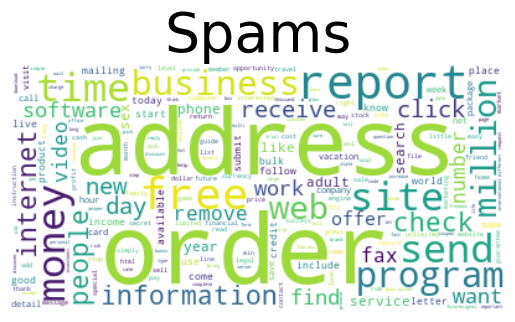

In [137]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

data['Tokens'] = emails

# spams
spams = data.loc[data['Label'] == 1, ['Tokens']]
spam_x = tf_vectorizer.fit_transform([" ".join(text) for text in spams['Tokens']]).toarray()

df = pd.DataFrame(spam_x.tolist(), columns=tf_vectorizer.get_feature_names_out())
df.head(10)

wordcloud = WordCloud(background_color='white', max_words=200,
                      stopwords = STOPWORDS, collocations=True).generate_from_frequencies(df.T.sum(axis=1))
plt.title('Spams', fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

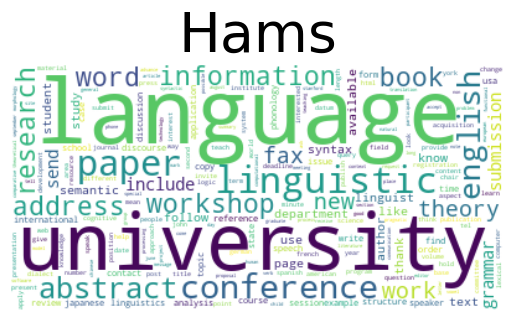

In [138]:
# hams
hams = data.loc[data['Label'] == 0, ['Tokens']]
ham_x = tf_vectorizer.fit_transform([" ".join(text) for text in hams['Tokens']]).toarray()

df = pd.DataFrame(ham_x.tolist(), columns=tf_vectorizer.get_feature_names_out())

wordcloud = WordCloud(background_color='white', max_words=200,
                      stopwords = STOPWORDS, collocations=True).generate_from_frequencies(df.T.sum(axis=1))
plt.title('Hams', fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Split to train and test data
The split is needed for supervised algorithms and supervised deep learning. I'm going to expriment with supervised algorithms, trying each on CounVectorizer and on TF-IDF.

In [139]:
from sklearn.model_selection import train_test_split

# split to train and test data for CountVectorizer
x_train,x_test,y_train,y_test = train_test_split(bag_of_words, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# split to train and test data for TF-IDF
x2_train,x2_test,y2_train,y2_test = train_test_split(tf_idf, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# split to train and test data for embeddings
x3_train,x3_test,y3_train,y3_test = train_test_split(email_embeddings, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# Classification algorithms (supervised learning)
https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2 <br />
As we can see, the worse results are given by Naive Bayes with CountVectorizer. Other algorithms are dealing more or less well. The best results are given by VotingClassifier. <br />
We see that embeddings indeed performs better.
## Evaluation metrics:
**Accuracy** = (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives) <br />
Accuracy measures the proportion of correct predictions made by the model out of the total number of predictions.


**Precision** = True Positives / (True Positives + False Positives) <br />
Precision measures the proportion of true positive predictions out of all the positive predictions made by the model.


**Recall** = True Positives / (True Positives + False Negatives) <br />
Recall measures the proportion of true positive predictions to the number of actual positives (true positives + false negatives).


**F1 Score** = 2 * (Precision * Recall) / (Precision + Recall) <br />
An F1 score reaches its best value at 1 (perfect precision and recall) and its worst value at 0.

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score

# printing statistics
def print_stats(y1, pred1, y2, pred2, title):
    
    cm1 = confusion_matrix(y1, pred1)
    cm2 = confusion_matrix(y2, pred2)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title)
    
    sns.heatmap(cm1, annot=True, fmt="d", linewidths=2, cmap="Greens", cbar=False, ax=ax[0])
    ax[0].set_title('Train set')
    ax[0].set_xlabel('Predicted');
    ax[0].set_ylabel('Real');
    ax[0].xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax[0].yaxis.set_ticklabels(['Ham', 'Spam']);
    
    sns.heatmap(cm2, annot=True, fmt="d", linewidths=2, cmap="Blues", cbar=False, ax=ax[1])
    ax[1].set_title('Test set')
    ax[1].set_xlabel('Predicted');
    ax[1].set_ylabel('Real');
    ax[1].xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax[1].yaxis.set_ticklabels(['Ham', 'Spam']);
    plt.show()
    
    data = {
        'Accuracy': [
            "{:.2f}".format(balanced_accuracy_score(y1, pred1)), 
            "{:.2f}".format(balanced_accuracy_score(y2, pred2))],  
        'Precision': [
            "{:.2f}".format(precision_score(y1, pred1)), 
            "{:.2f}".format(precision_score(y2, pred2))], 
        'Recall': [
            "{:.2f}".format(recall_score(y1, pred1)), 
            "{:.2f}".format(recall_score(y2, pred2))],
        'F1 score': [
            "{:.2f}".format(f1_score(y1, pred1)), 
            "{:.2f}".format(f1_score(y2, pred2))] 
    }
    df = pd.DataFrame(data)
    df.index = ['Train', 'Test']
    print(df)

The algorithms are run three times: on bag of words, TF-IDF and word embeddings
## Gaussian Naive Bayes

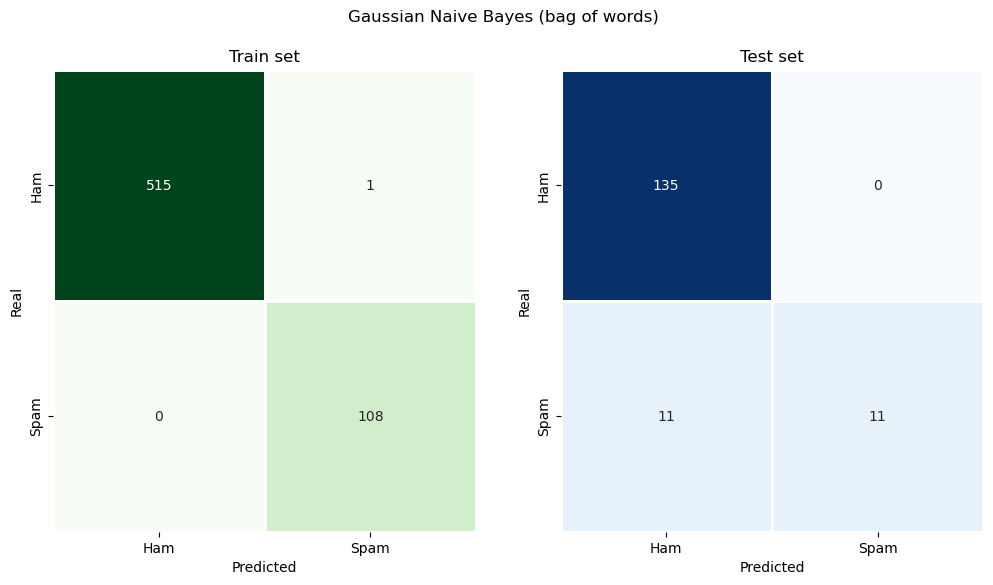

      Accuracy Precision Recall F1 score
Train     1.00      0.99   1.00     1.00
Test      0.75      1.00   0.50     0.67


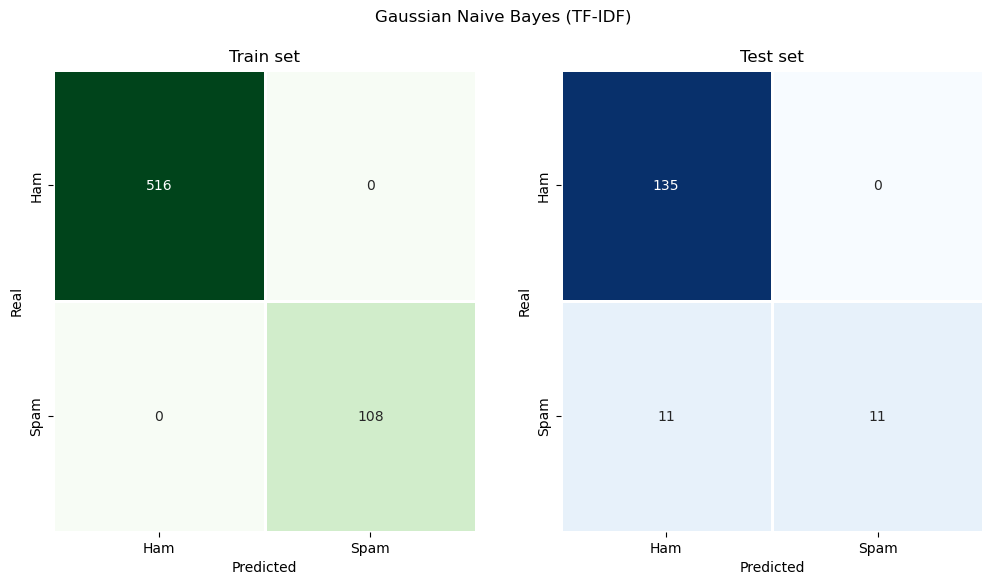

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.75      1.00   0.50     0.67


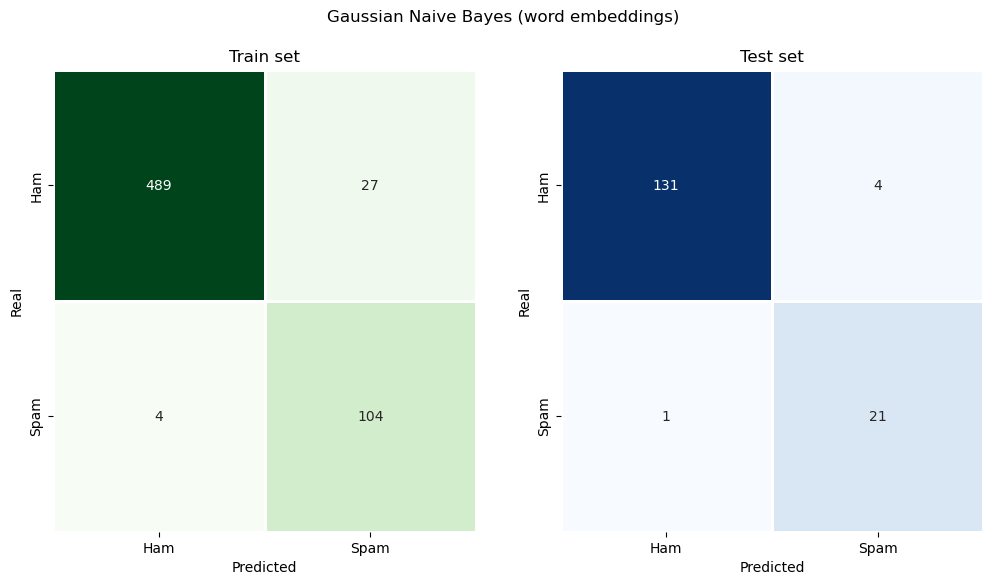

      Accuracy Precision Recall F1 score
Train     0.96      0.79   0.96     0.87
Test      0.96      0.84   0.95     0.89


In [141]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
pred1 = NB.predict(x_train)
pred2 = NB.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Gaussian Naive Bayes (bag of words)")

NB2 = GaussianNB()
NB2.fit(x2_train,y2_train)
pred1 = NB2.predict(x2_train)
pred2 = NB2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Gaussian Naive Bayes (TF-IDF)")

NB3 = GaussianNB()
NB3.fit(x3_train,y3_train)
pred1 = NB3.predict(x3_train)
pred2 = NB3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Gaussian Naive Bayes (word embeddings)")

## Logistic regression

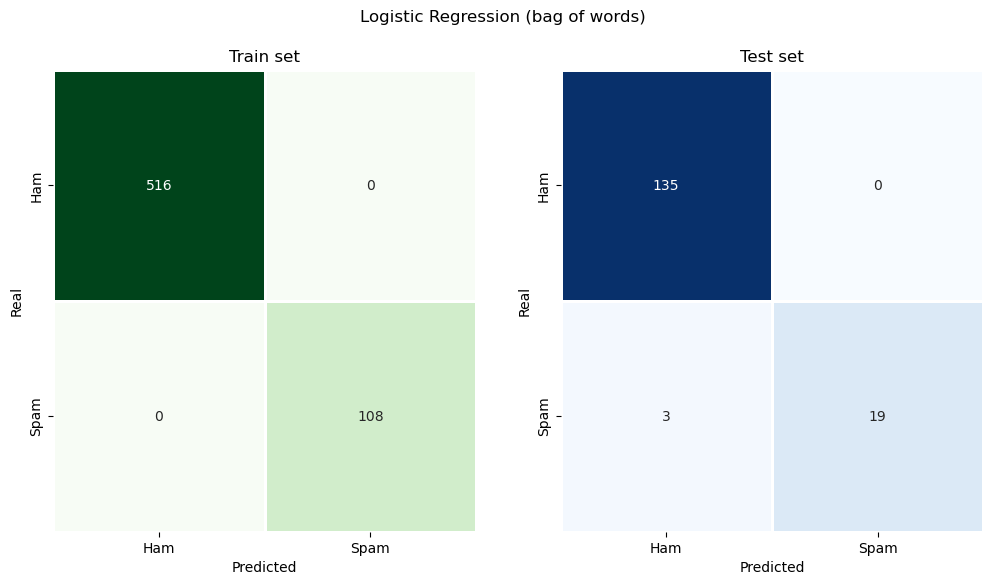

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.93      1.00   0.86     0.93


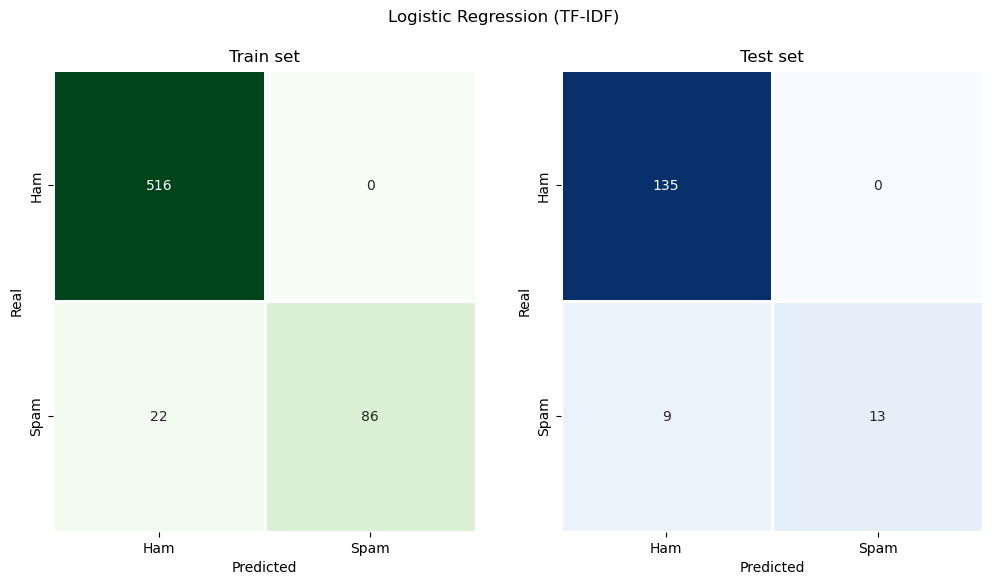

      Accuracy Precision Recall F1 score
Train     0.90      1.00   0.80     0.89
Test      0.80      1.00   0.59     0.74


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


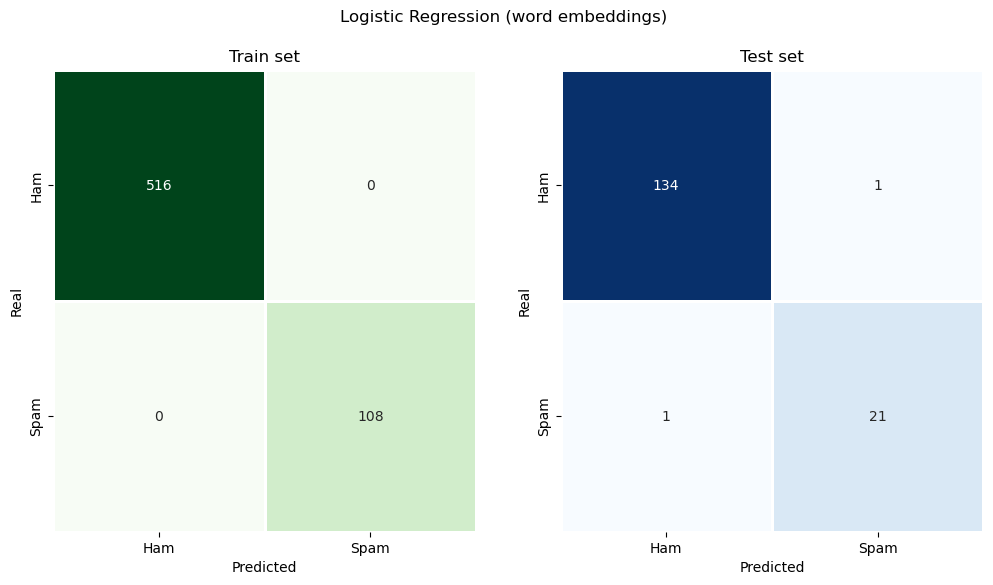

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.97      0.95   0.95     0.95


In [142]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
pred1 = LR.predict(x_train)
pred2 = LR.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Logistic Regression (bag of words)")

LR2 = LogisticRegression()
LR2.fit(x2_train,y2_train)
pred1 = LR2.predict(x2_train)
pred2 = LR2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Logistic Regression (TF-IDF)")

LR3 = LogisticRegression()
LR3.fit(x3_train,y3_train)
pred1 = LR3.predict(x3_train)
pred2 = LR3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Logistic Regression (word embeddings)")

## *k*-nearest neighbors

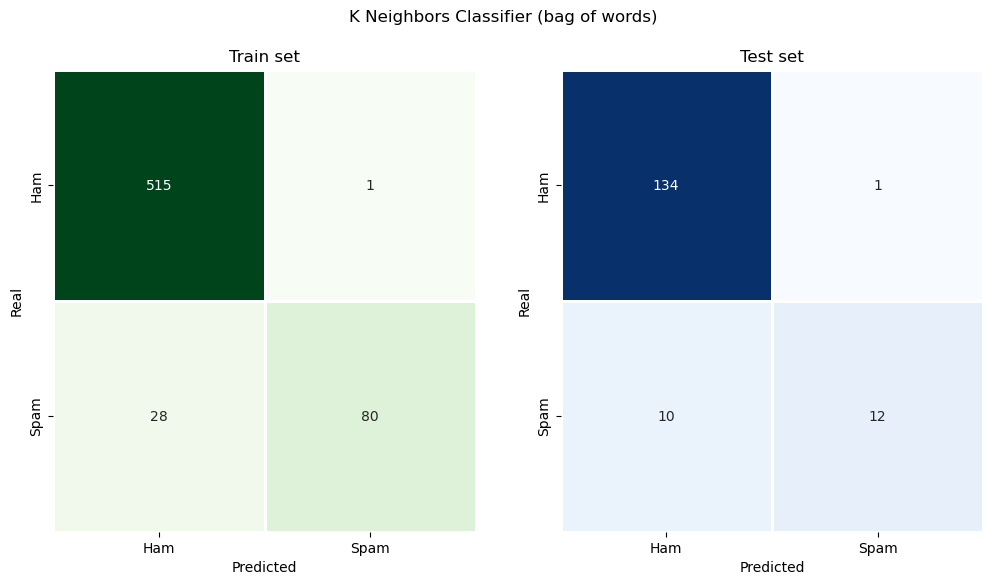

      Accuracy Precision Recall F1 score
Train     0.87      0.99   0.74     0.85
Test      0.77      0.92   0.55     0.69


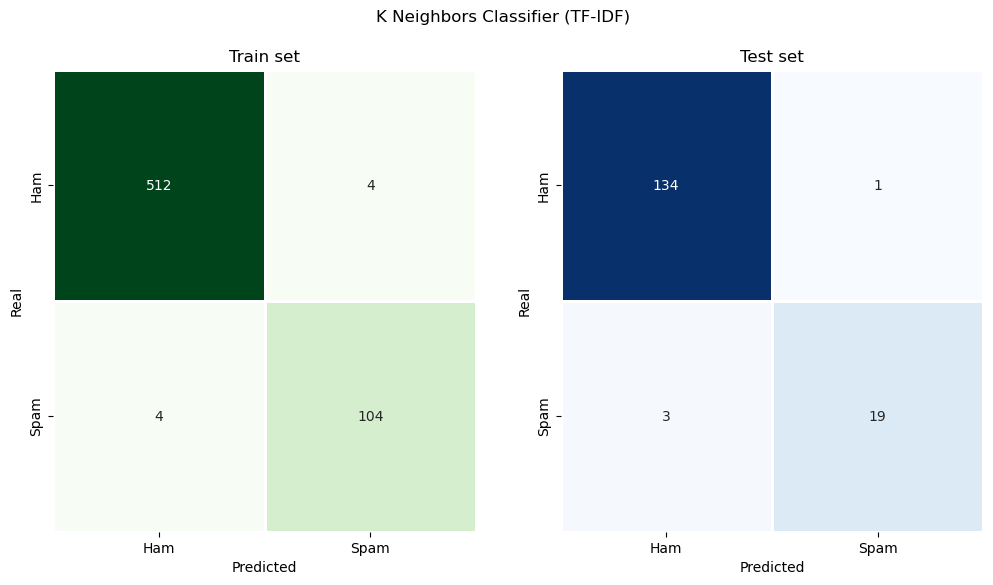

      Accuracy Precision Recall F1 score
Train     0.98      0.96   0.96     0.96
Test      0.93      0.95   0.86     0.90


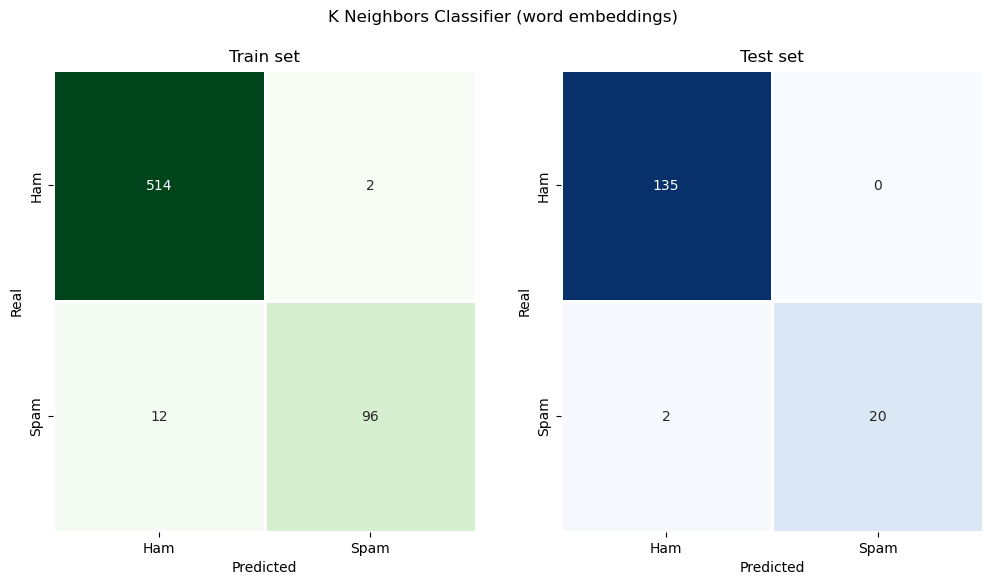

      Accuracy Precision Recall F1 score
Train     0.94      0.98   0.89     0.93
Test      0.95      1.00   0.91     0.95


In [143]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred1 = KNN.predict(x_train)
pred2 = KNN.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "K Neighbors Classifier (bag of words)")

KNN2 = KNeighborsClassifier()
KNN2.fit(x2_train,y2_train)
pred1 = KNN2.predict(x2_train)
pred2 = KNN2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "K Neighbors Classifier (TF-IDF)")

KNN3 = KNeighborsClassifier()
KNN3.fit(x3_train,y3_train)
pred1 = KNN3.predict(x3_train)
pred2 = KNN3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "K Neighbors Classifier (word embeddings)")

## Linear support vector

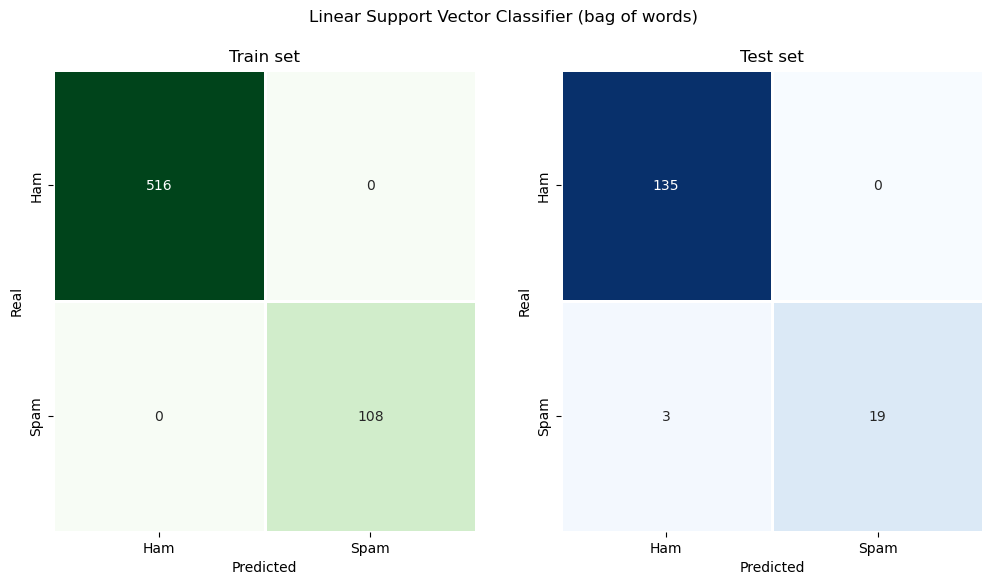

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.93      1.00   0.86     0.93


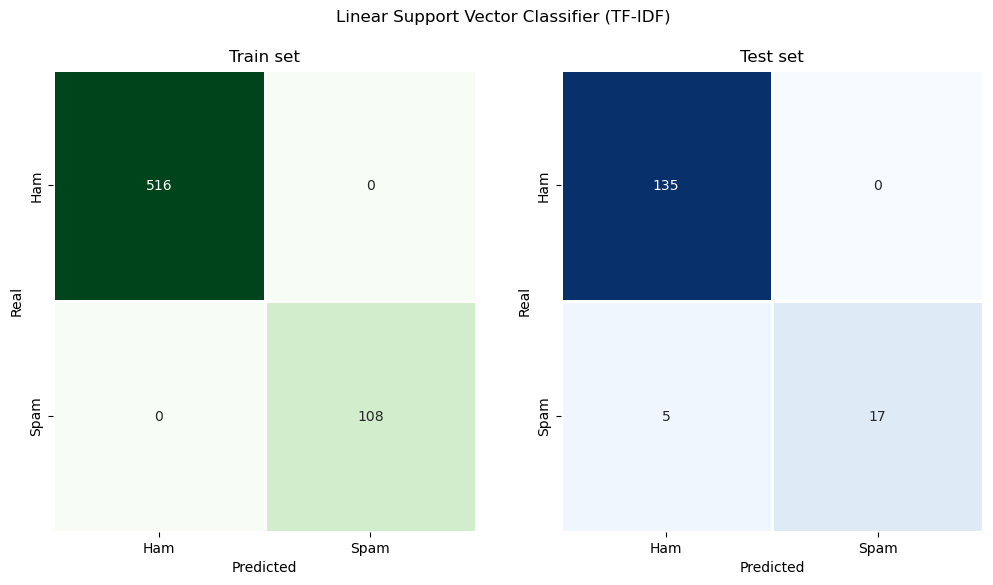

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.89      1.00   0.77     0.87


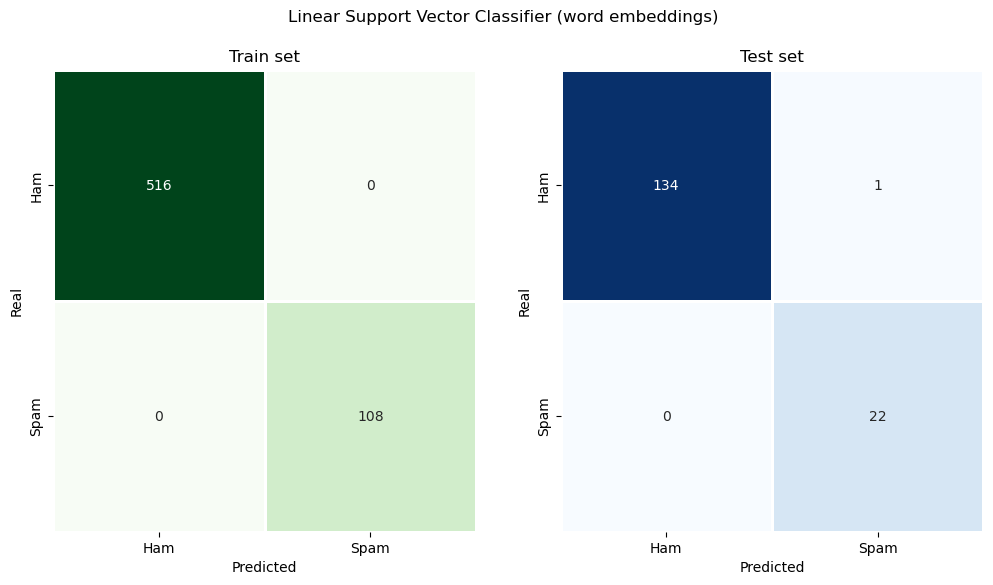

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      1.00      0.96   1.00     0.98


In [144]:
from sklearn.svm import LinearSVC

SVC = LinearSVC(max_iter=2000)
SVC.fit(x_train,y_train)
pred1 = SVC.predict(x_train)
pred2 = SVC.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Linear Support Vector Classifier (bag of words)")

SVC2 = LinearSVC(max_iter=2000)
SVC2.fit(x2_train,y2_train)
pred1 = SVC2.predict(x2_train)
pred2 = SVC2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Linear Support Vector Classifier (TF-IDF)")

SVC3 = LinearSVC(max_iter=2000)
SVC3.fit(x3_train,y3_train)
pred1 = SVC3.predict(x3_train)
pred2 = SVC3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Linear Support Vector Classifier (word embeddings)")

## Decision tree

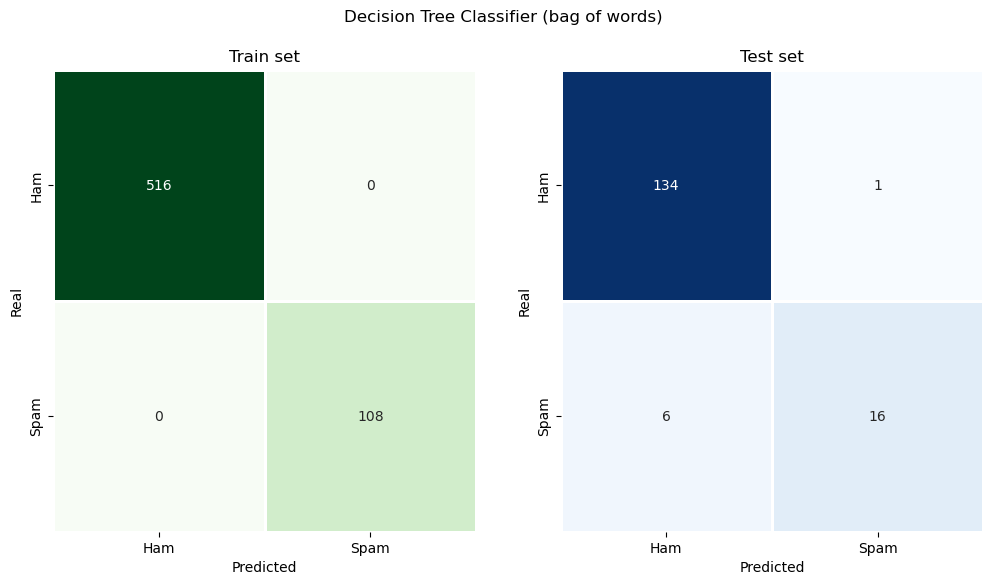

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.86      0.94   0.73     0.82


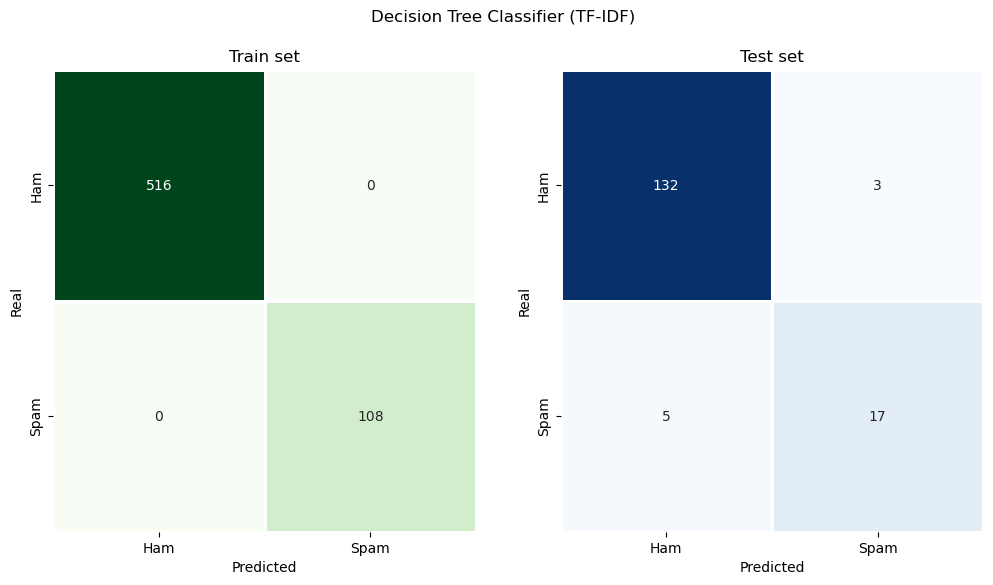

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.88      0.85   0.77     0.81


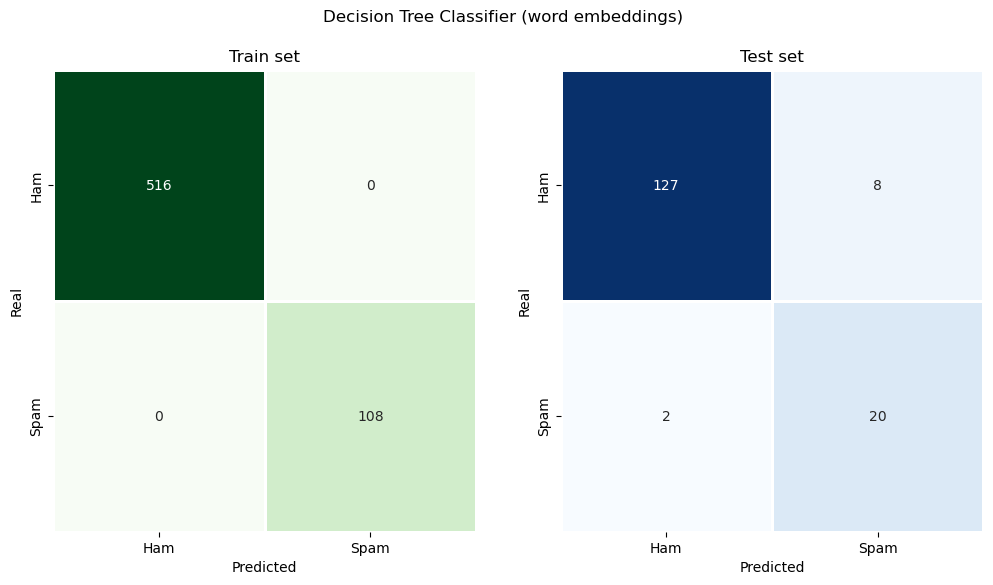

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.92      0.71   0.91     0.80


In [145]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred1 = DTC.predict(x_train)
pred2 = DTC.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Decision Tree Classifier (bag of words)")

DTC2 = DecisionTreeClassifier()
DTC2.fit(x2_train,y2_train)
pred1 = DTC2.predict(x2_train)
pred2 = DTC2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Decision Tree Classifier (TF-IDF)")

DTC3 = DecisionTreeClassifier()
DTC3.fit(x3_train,y3_train)
pred1 = DTC3.predict(x3_train)
pred2 = DTC3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Decision Tree Classifier (word embeddings)")

## Random forest

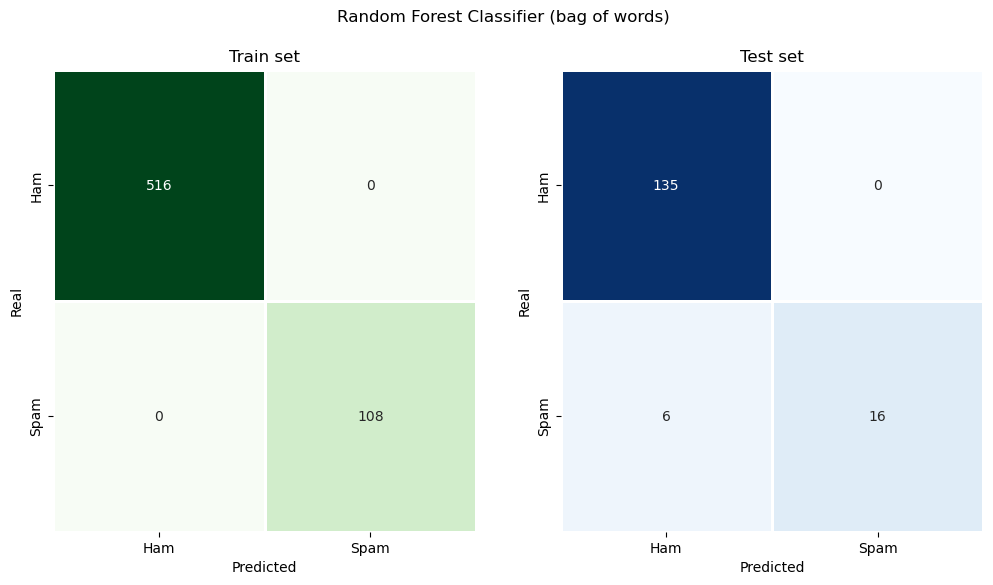

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.86      1.00   0.73     0.84


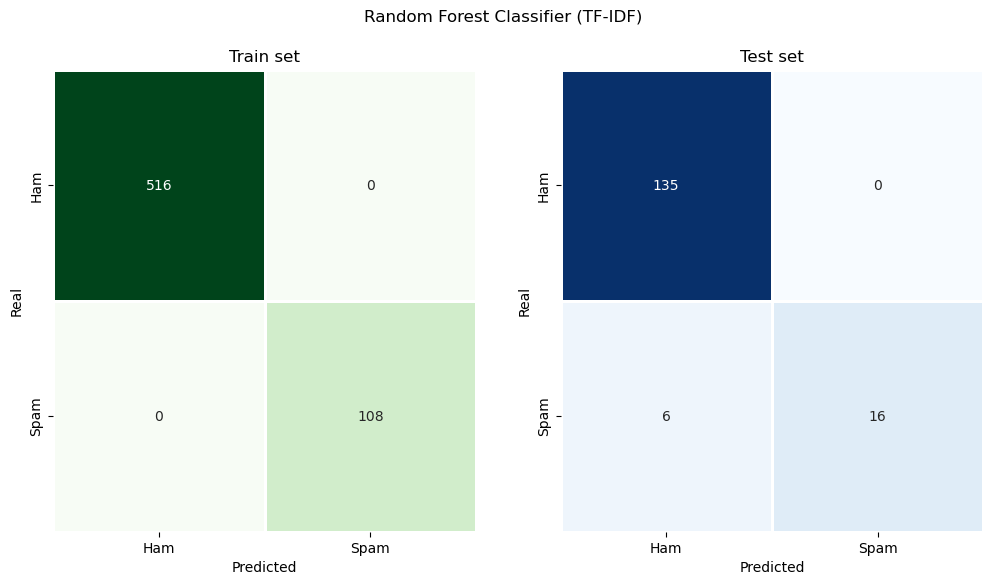

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.86      1.00   0.73     0.84


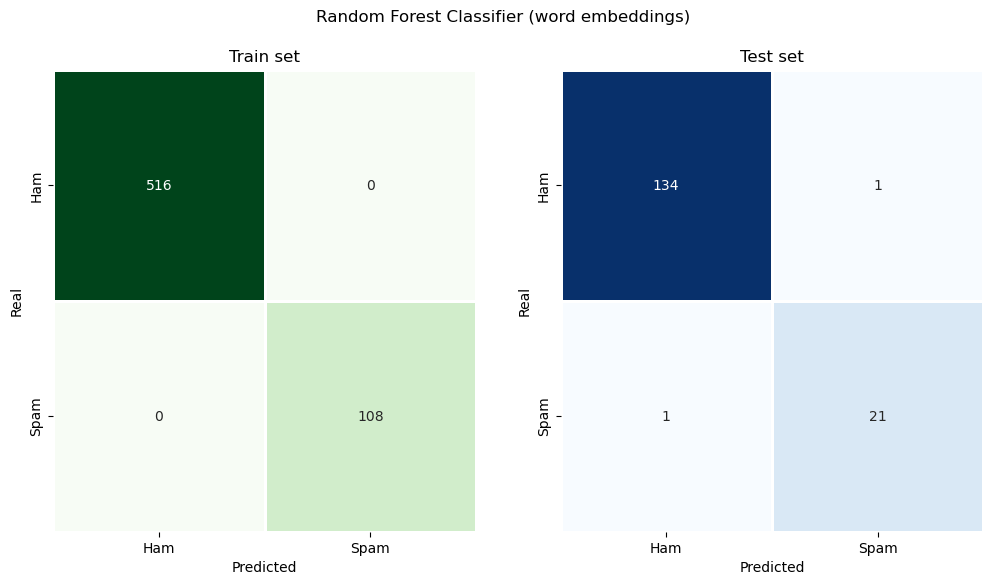

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.97      0.95   0.95     0.95


In [146]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred1 = RFC.predict(x_train)
pred2 = RFC.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Random Forest Classifier (bag of words)")

RFC2 = RandomForestClassifier()
RFC2.fit(x2_train,y2_train)
pred1 = RFC2.predict(x2_train)
pred2 = RFC2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Random Forest Classifier (TF-IDF)")

RFC3 = RandomForestClassifier()
RFC3.fit(x3_train,y3_train)
pred1 = RFC3.predict(x3_train)
pred2 = RFC3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Random Forest Classifier (word embeddings)")

## Voting classifier

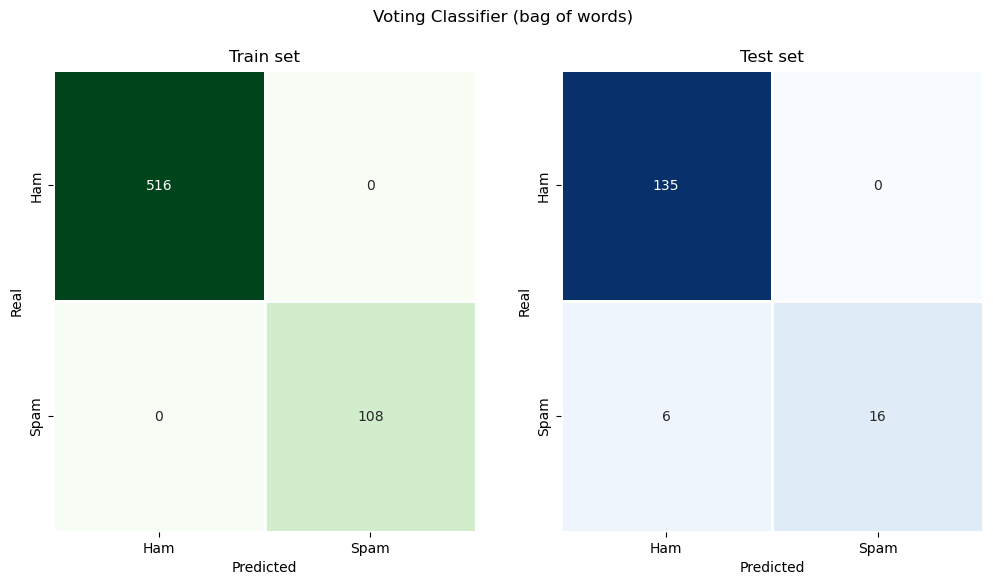

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.86      1.00   0.73     0.84


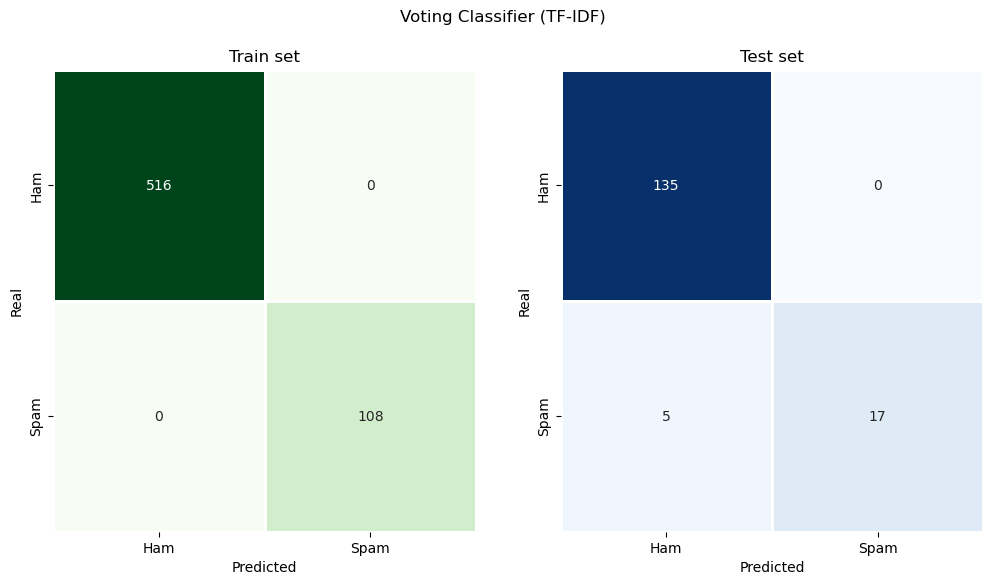

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.89      1.00   0.77     0.87


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


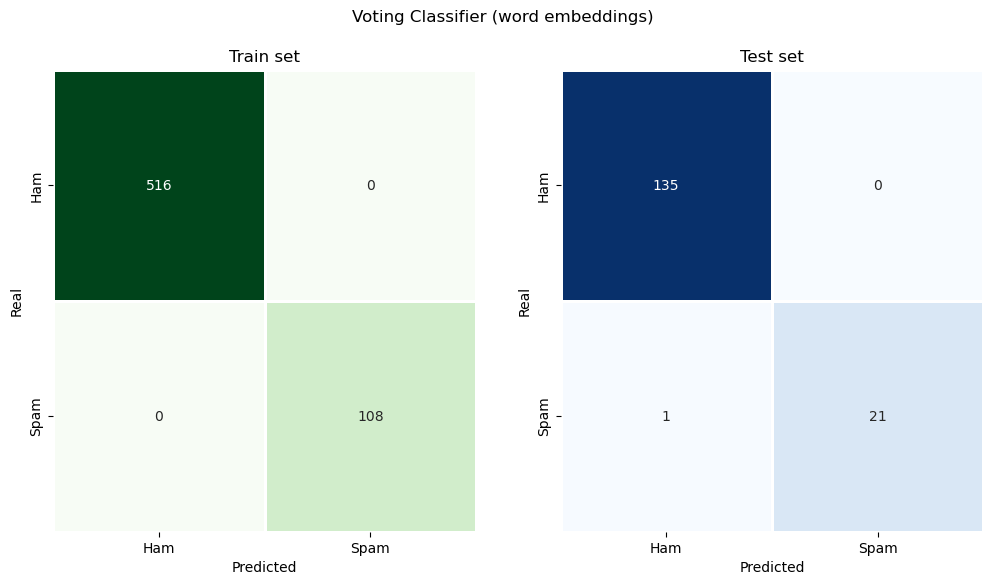

      Accuracy Precision Recall F1 score
Train     1.00      1.00   1.00     1.00
Test      0.98      1.00   0.95     0.98


In [147]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators=[('LR',LR),('KNN',KNN),('DTC',DTC),('RFC',RFC),('SVC',SVC)], voting='hard')
VC.fit(x_train,y_train)
pred1 = VC.predict(x_train)
pred2 = VC.predict(x_test)
print_stats(y_train, pred1, y_test, pred2, "Voting Classifier (bag of words)")

VC2 = VotingClassifier(estimators=[('LR',LR2),('KNN',KNN2),('DTC',DTC2),('RFC',RFC2),('SVC',SVC2)], voting='hard')
VC2.fit(x2_train,y2_train)
pred1 = VC2.predict(x2_train)
pred2 = VC2.predict(x2_test)
print_stats(y2_train, pred1, y2_test, pred2, "Voting Classifier (TF-IDF)")

VC3 = VotingClassifier(estimators=[('LR',LR3),('KNN',KNN3),('DTC',DTC3),('RFC',RFC3),('SVC',SVC3)], voting='hard')
VC3.fit(x3_train,y3_train)
pred1 = VC3.predict(x3_train)
pred2 = VC3.predict(x3_test)
print_stats(y3_train, pred1, y3_test, pred2, "Voting Classifier (word embeddings)")

# Unsupervised algorithms 

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score

# printing statistics
def print_single_stats(y, pred, title):
    conf = confusion_matrix(y_pred=pred,y_true=y)
    plt.title(title)
    ax=plt.subplot()
    sns.heatmap(conf, annot=True, fmt="d", linewidths=2, cmap="Greens", cbar=False)
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax.yaxis.set_ticklabels(['Ham', 'Spam']);
    plt.show()
    
    data = {
        'Accuracy': [
            "{:.2f}".format(balanced_accuracy_score(y, pred))],  
        'Precision': [
            "{:.2f}".format(precision_score(y, pred))], 
        'Recall': [
            "{:.2f}".format(recall_score(y, pred))],
        'F1 score': [
            "{:.2f}".format(f1_score(y, pred))] 
    }
    df = pd.DataFrame(data)
    df.index = ['Train']
    print(df)

In [149]:
def show_emails_from_clusters(labels):
    numpy_labels = np.array(labels)
    for label in np.unique(labels):
        print("==================================")
        print("Several emails from the cluster", label)
        print("==================================")
        for i in range(0, 5):
            length = len(np.where(numpy_labels == label)[0])
            if i < length:
                pos = np.where(numpy_labels == label)[0][i]
                print(data.iloc[pos]['Body'][:1000])
                print('----------------------------------')

## Topic modelling (LDA and NMF)
We can use LDA (or NMF) for extracting the topics, or K-Means for finding clusters, which can be helpful. <br />
https://www.dataknowsall.com/topicmodels.html <br />
https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering <br />
https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2 <br />
https://towardsdatascience.com/the-ultimate-guide-to-clustering-algorithms-and-topic-modeling-3a65129df324 <br />
https://towardsdatascience.com/basic-nlp-on-the-texts-of-harry-potter-topic-modeling-with-latent-dirichlet-allocation-f3c00f77b0f5 <br />
We can choose between Sklearn LDA and Gensim LDA. I chosed the Sklearn's for now, since it's faster and gives better results. https://medium.com/@benzgreer/sklearn-lda-vs-gensim-lda-691a9f2e9ab7 <br />
There's an alternative for LDA, NMF. So I tried them both. <br />
https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df

In [181]:
from sklearn.decomposition import LatentDirichletAllocation

def explore_topics(algorithm, chosen_vectorizer):
    results_dict = {}
    top_n_words = 15
    feature_names = chosen_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(algorithm.components_):
        top_n_words = 15
        top_words = [feature_names[i] for i in topic.argsort()[-top_n_words:]]
        results_dict[f'Topic {topic_idx}'] = top_words
    return pd.DataFrame.from_dict(results_dict)

def get_lda_features(model, n_components):
    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    features = lda.fit_transform(model)
    return features, lda

It's better first to choose the best number of topics with eiter perplexity, or coherence. <br />
* **Perplexity**: Lower the perplexity better the model.
* **Coherence**: Higher the topic coherence, the topic is more human interpretable. 

In [ ]:
ks = range(1, 25)
perplexities = []
for k in ks:
    lda = LatentDirichletAllocation(n_components=k, random_state=42)
    # Fit model to samples
    lda.fit(x_train)
    # Append the perplexity
    perplexities.append(lda.perplexity(x_train))

# Plot 
plt.plot(ks, perplexities, '-o')
plt.title("Elbow method")
plt.xlabel('number of topics')
plt.ylabel('perplexity')
plt.xticks(ks)
plt.show()

In [ ]:
lda_features, lda_x = get_lda_features(x_train, 6)
explore_topics(lda_x, count_vectorizer)

In [ ]:
# lda_features, lda_x = get_lda_features(x2_train, 6)
# explore_topics(lda_x, tf_vectorizer)

In [153]:
# from sklearn.decomposition import NMF

# nmf  = NMF(n_components = 3)
# nmf.fit_transform(bag_of_words)
# explore_topics(nmf, count_vectorizer)

# # Gensim LDA and coherence

## One-class SVM
Each entry is either 1 for normal data or -1 for an anomaly.

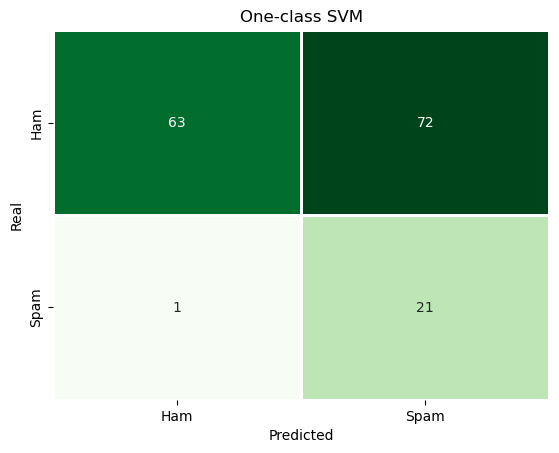

      Accuracy Precision Recall F1 score
Train     0.71      0.23   0.95     0.37


In [196]:
from sklearn.svm import OneClassSVM

# train only on normal data
x_train_normal = x2_train[y2_train == 0]

OCSVM = OneClassSVM(kernel='sigmoid', nu=0.5, gamma='auto')
OCSVM.fit(x_train_normal)
pred = np.array([1 if p == -1 else 0 for p in OCSVM.predict(x2_test)])
print_single_stats(y2_test, pred, "One-class SVM")

## Local Outlier Factor

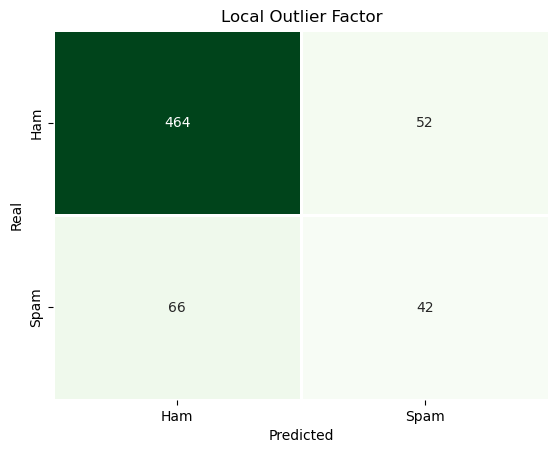

      Accuracy Precision Recall F1 score
Train     0.64      0.45   0.39     0.42


In [186]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors=10, contamination=0.15)
pred = np.array([1 if p == -1 else 0 for p in LOF.fit_predict(x2_train)])
print_single_stats(y2_train, pred, "Local Outlier Factor")

## Isolation Forest

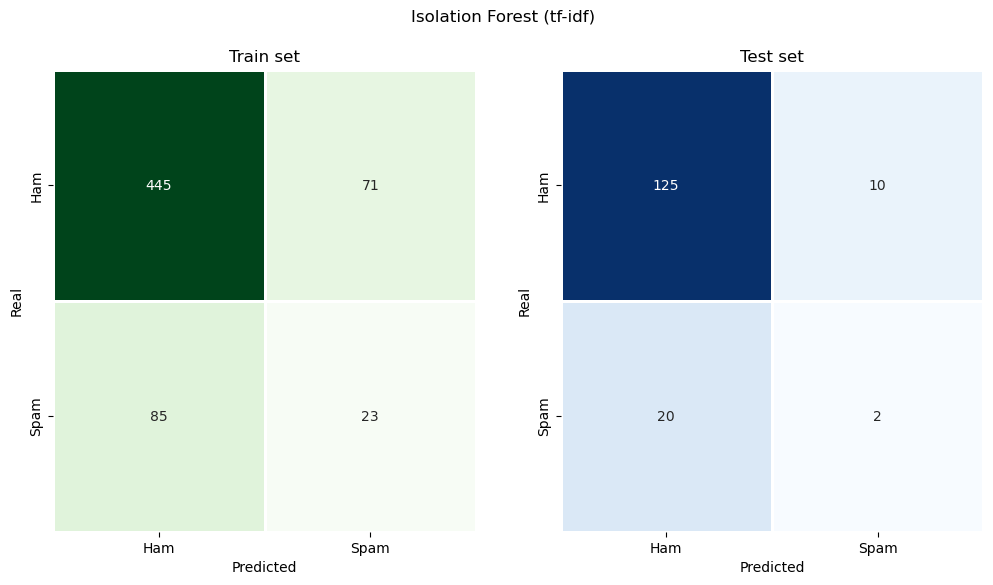

      Accuracy Precision Recall F1 score
Train     0.54      0.24   0.21     0.23
Test      0.51      0.17   0.09     0.12


In [185]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(n_estimators=30, max_samples=32, contamination=0.15)
IF.fit(x2_train)
pred1 = np.array([1 if p == -1 else 0 for p in IF.predict(x2_train)])
pred2 = np.array([1 if p == -1 else 0 for p in IF.predict(x2_test)])
print_stats(y2_train, pred1, y2_test, pred2, "Isolation Forest (tf-idf)")

## Gaussian Mixture Model
https://vitalflux.com/gaussian-mixture-models-what-are-they-when-to-use/ <br/>
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4 (also determining appropriate number of clusters)<br/>
https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb<br/>
https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms<br/>
https://stats.stackexchange.com/questions/349258/correct-number-of-components-in-gmm-according-to-bic-and-aic-plots<br/>
https://stats.stackexchange.com/questions/368560/elbow-test-using-aic-bic-for-identifying-number-of-clusters-using-gmm<br/>
https://grabngoinfo.com/how-to-decide-the-number-of-clusters-data-science-interview-questions-and-answers/
Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) scores

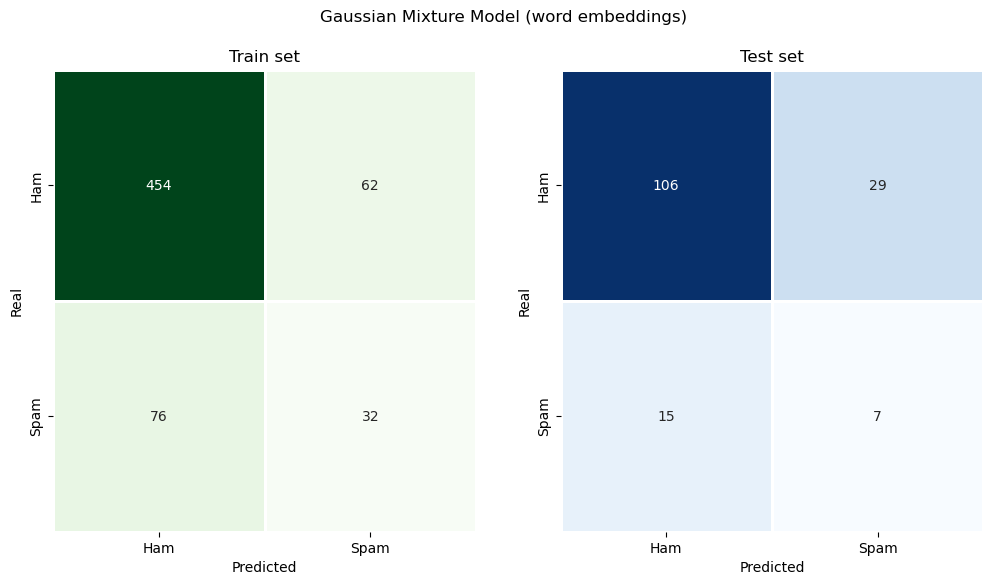

      Accuracy Precision Recall F1 score
Train     0.59      0.34   0.30     0.32
Test      0.55      0.19   0.32     0.24


In [164]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=1, covariance_type='spherical', random_state=42)
GMM.fit(x2_train)
scores = GMM.score_samples(x2_train)
threshold = np.percentile(scores, 15)
pred1 = np.array([1 if score < threshold else 0 for score in GMM.score_samples(x2_train)])
pred2 = np.array([1 if score < threshold else 0 for score in GMM.score_samples(x2_test)])
print_stats(y2_train, pred1, y2_test, pred2, "Gaussian Mixture Model (word embeddings)")

## K-Means
https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py <br />
https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ <br />
https://stackoverflow.com/a/69024239 <br/>
https://stackoverflow.com/a/27586132 <br />
https://www.dataknowsall.com/textclustering.html <br />
https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook <br />
https://medium.com/@jwbtmf/visualizing-data-using-k-means-clustering-unsupervised-machine-learning-8b59eabfcd3d <br />
For choosing the appropriate number of clusters, we can use Elbow method or Silhouette score. Let's use Elbow method.

In [ ]:
# finding number of clusters with Elbow method
# very long
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    # Fit model to samples
    kmeans.fit(x2_train)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(x2_train)

# top 15 words from each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names_out()
results_dict = {}
for i in range(6):
    terms_list = []
    for ind in order_centroids[i, :15]:  
        terms_list.append(terms[ind])
    results_dict[f'Cluster {i}'] = terms_list
df_clusters = pd.DataFrame.from_dict(results_dict)
df_clusters

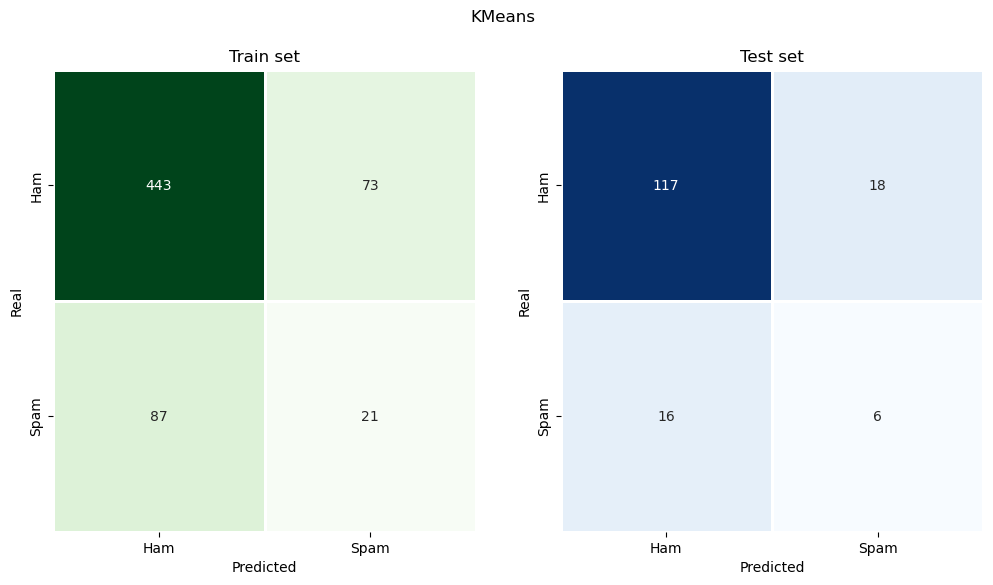

      Accuracy Precision Recall F1 score
Train     0.53      0.22   0.19     0.21
Test      0.57      0.25   0.27     0.26


In [168]:
from scipy.spatial.distance import cdist

# anomalies are far from the clusters' centers
centroids = kmeans.cluster_centers_
distances = cdist(x2_train, centroids, 'euclidean')
min_distances = distances[np.arange(len(distances)), labels]
threshold = np.percentile(min_distances, 85)
pred1 = np.array([1 if d > threshold else 0 for d in min_distances])

labels = kmeans.predict(x2_test)
centroids = kmeans.cluster_centers_
distances = cdist(x2_test, centroids, 'euclidean')
min_distances = distances[np.arange(len(distances)), labels]
threshold = np.percentile(min_distances, 85)
pred2 = np.array([1 if d > threshold else 0 for d in min_distances])

print_stats(y2_train, pred1, y2_test, pred2, "KMeans")

## DBSCAN
https://youtu.be/RDZUdRSDOok <br/>
https://dev.to/wmisingo/machine-learning-text-clustering-with-dbscan-399n <br/>
https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80 <br/>
https://www.advancinganalytics.co.uk/blog/2022/7/22/using-machine-learning-to-perform-text-clustering <br/>
https://www.kaggle.com/code/karthik3890/text-clustering
http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

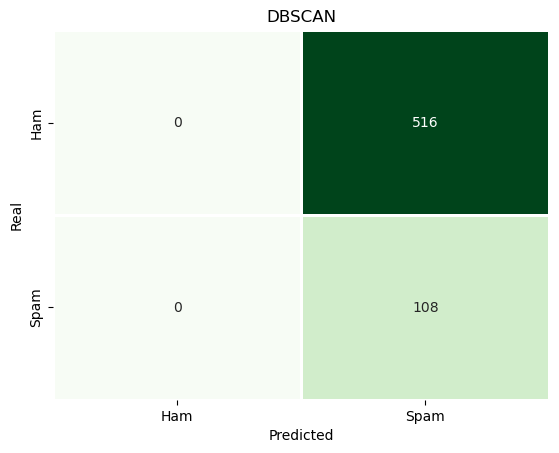

      Accuracy Precision Recall F1 score
Train     0.50      0.17   1.00     0.30


In [199]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.4142, min_samples=624)
dbscan.fit(x2_train)
labels = dbscan.labels_
pred = np.array([1 if p == -1 else 0 for p in labels])
print_single_stats(y2_train, pred, "DBSCAN")

## Agglomerative clustering
https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

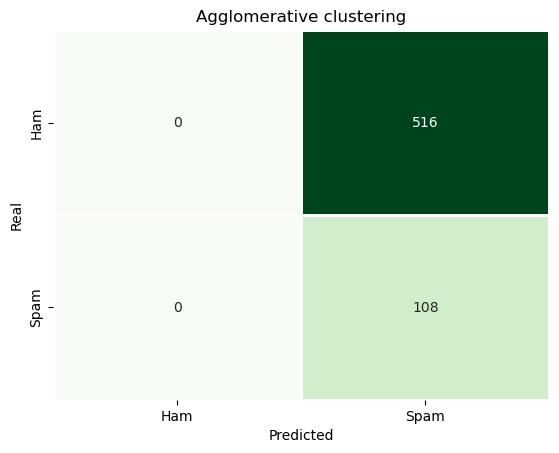

      Accuracy Precision Recall F1 score
Train     0.50      0.17   1.00     0.30


In [172]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

ac = AgglomerativeClustering(n_clusters = 3)
labels = ac.fit_predict(x2_train)

centroids = np.array([x2_train[labels == i].mean(axis=0) for i in range(3)])
distances = cdist(x2_train, centroids, 'euclidean')
min_distances = distances.min(axis=1)
threshold = np.percentile(min_distances, 85)

predictions = np.array([1 if d > threshold else 0 for d in min_distances])
print_single_stats(y2_train, pred, "Agglomerative clustering")

# Deep learning algorithms
(subset of machine learning algorithms)<br/>
### [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition)
<ul>
    <li><b>shallow</b> vs <b>deep</b> methods, <b>feature engineering</b> (pages 17-18)</li>
    <li><b>XGBoost</b> (gradient boosting machines) vs <b>Keras</b> (page 19)</li>
    <li><b>History</b> object and overfitting (pages 74-76)</li>
    <li>? <b>weight regularization</b> and <b>dropout</b> (pages 107-110)</li>
    <li>? how do <b>2D convnets</b> and <b>MaxPooling2D</b> layer are working? (pages 122-129)</li>
    <li>convnets and dealing with overfitting using <b>data augmentation</b> (page 159)</li>
    <li><b>tokenization</b> (for more, look at <i>Tokenization</i> section above)</li>
    <li><b>Embedding</b> layer (page 186)</li>
    <li><b>SimpleRNN</b>, <b>LSTM</b> and <b>GRU</b></li>
</ul>

## Supervised Learning
**CNNs** do not use output from previous layers directly to affect future layers (apart from the standard feed-forward propagation). An example would be an image, where each pixel can be independently processed. <br />
**RNNs** maintain a kind of 'memory' of previous inputs. This is useful in sequential data where the position and context of an element matter, like in a sentence. <br />
https://pruthivi.medium.com/spam-classification-using-deep-neural-network-architecture-129860a6b9fb<br />
https://www.educba.com/tensorflow-sequential/

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Generate the classification report
    report = classification_report(y, predictions, target_names=['Ham', 'Spam'])
    print(report)

    # Generate the confusion matrix
    conf = confusion_matrix(y, predictions)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax.yaxis.set_ticklabels(['Ham', 'Spam']);
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

### Feedforward neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
        Dense(64, activation='relu', input_shape=(x3_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ], name="nn_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train, y3_train, epochs=10, batch_size=64, validation_split=0.1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train, y3_train, "Feedforward NN on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test, y3_test, "Feedforward NN on test set")

### RNN
#### Theory
https://machinelearningmastery.com/calculus-in-action-neural-networks/<br/>
https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them<br/>
https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/<br/>
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#### Tutorials
https://victorzhou.com/blog/keras-rnn-tutorial/
#### Documentation
https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization<br/>
https://keras.io/api/optimizers/

In [ ]:
# Add an extra dimension to input sequences, required for RNN and LSTM
x3_train_expanded = np.expand_dims(x3_train, axis=1)
x3_test_expanded = np.expand_dims(x3_test, axis=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential([
        SimpleRNN(units=64, return_sequences=True, input_shape=(x3_train_expanded.shape[1], x3_train_expanded.shape[2])),
        Dropout(0.2),
        SimpleRNN(units=32, return_sequences=False),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ], name="rnn_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train_expanded, y3_train, epochs=10, batch_size=64, validation_split=0.1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train_expanded, y3_train, "RNN on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test_expanded, y3_test, "RNN on test set")

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=(x3_train_expanded.shape[1], x3_train_expanded.shape[2])),
        Dropout(0.2),
        LSTM(units=32, return_sequences=False),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ], name="lstm_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train_expanded, y3_train, epochs=10, batch_size=64, validation_split=0.1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train_expanded, y3_train, "LSTM on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test_expanded, y3_test, "LSTM on test set")

## Unsupervised Learning
OpenAI:
> While unsupervised deep learning algorithms can help learn useful representations of the data, they typically need to be combined with a supervised classifier or clustering algorithm to perform the actual spam detection. For instance, you could use an autoencoder to learn a low-dimensional representation of the email data and then train a supervised classifier (e.g., logistic regression, SVM) on the extracted features to classify emails as spam or ham.

### Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

In [200]:
import tensorflow as tf
from tensorflow.keras import layers, losses

X_train,X_valid,Y_train,Y_valid = train_test_split(x3_train, y3_train, random_state=42, test_size=0.2)

# Keep only the normal data for the training dataset
X_train_normal = X_train[Y_train == 0]
X_valid_normal = X_valid[Y_valid == 0]

# Input layer
input = tf.keras.layers.Input(shape=(x3_train.shape[1],))

# Encoder layers
encoder = Sequential([
    layers.Dense(256, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(300, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=20, 
                          batch_size=256,
                          validation_data=(X_valid_normal, X_valid_normal),
                          shuffle=True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 92)

# Detect anomalies in the train set
train_predictions = autoencoder.predict(x3_train)
train_loss = np.mean(np.abs(train_predictions - x3_train), axis=1)
train_loss = train_loss.reshape((-1))
predictions = np.array([1 if loss > threshold else 0 for loss in train_loss])
print_stats(predictions, x3_train, y3_train, "Autoencoder on train set")

# Detect anomalies in the test set
test_predictions = autoencoder.predict(x3_test)
test_loss = np.mean(np.abs(test_predictions - x3_test), axis=1)
test_loss = test_loss.reshape((-1))
predictions = np.array([1 if loss > threshold else 0 for loss in test_loss])
print_stats(predictions, x3_test, y3_test, "Autoencoder on test set")